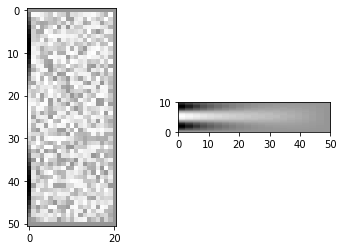

[[-0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.91158629e-01  9.17971351e-01  9.02895356e-01 ...  1.85075737e-01
   9.52232881e-01  0.00000000e+00]
 [-3.75267005e-01  2.58677684e-01  4.32250901e-01 ...  9.94456027e-01
   4.43689624e-01  0.00000000e+00]
 ...
 [-1.91158629e-01  5.14212016e-01  6.51200299e-01 ...  4.89061943e-01
   1.31219164e-01  0.00000000e+00]
 [-3.67394040e-16  7.26796848e-02  2.65321869e-01 ...  4.58799332e-01
   2.15456460e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# create an xy grid of points
Nx = 20
Ny = 50

xv = np.linspace(0, 50, Nx)
yv = np.linspace(0, 10, Ny)

x, y = np.meshgrid(xv, yv)

# initialise our matrix of potential V with random values
# note: we add one row and one column to apply the boundary conditions
# which makes it easier to iterate only within the region of interest
V = np.random.rand(Ny+1, Nx+1)

# set our boundary conditions
V[0,:] = 0.0
V[Ny,:] = 0.0


Vmax = -1.0
V[:-1,0] = Vmax*np.sin(3*np.pi*yv/max(yv))
V[:,Nx] = 0 # (should be at infinity; here we assume the decay along x is fast enough)

# relaxation method:
# iteratively replace value at point by average of 4 neighbours

Niter = 200
Vlist = list() # collect all iterations
# store the initial state (a copy, as V will change below)
Vlist.append(V.copy())
for it in range(1, Niter):
    Vtmp = V
    for ix in range(1, Nx):
        for iy in range(1, Ny):
            V[iy,ix] = 0.25*(Vlist[it-1][iy+1,ix] + Vlist[it-1][iy-1,ix] +
                            Vlist[it-1][iy,ix+1] + Vlist[it-1][iy,ix-1])
    Vlist.append(V.copy()) # store a copy of current iteration
    
# visualise initial state and last iteration
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(Vlist[0],interpolation='nearest', cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(Vlist[-1], interpolation='nearest', cmap=cm.Greys_r)
plt.show()
print(Vlist[0])